# Covid model
This project is for WAMM 2021 done by Hinda Nguyen and Katie Johnston

In [166]:
#import libraries that might be useful
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [167]:
#define some variables that will be useful
total_pop = 1e3 #how many people in our population
people = [total_pop - 1, 1, 0] #total number of people in each group, S I R

people_interact = total_pop*.2 #how many people everyone interacts with everyday
infect_chance = 0.5 #chance get infected after interaction
days_infectious = 10 #number of days an infected person can infect other people

##what other variables might we need

In [168]:
def one_day(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    for i in range(int(people[1])):
        for n in range(int(people_interact)):
            rand = random.random()
            if( rand < people[0]/total_pop): #suspetible person
                coin_toss=random.randint(0,1)
                if coin_toss==1:
                    people[0]-=1
                    people[1]+=1
                else:
                    people[0]-=0                
                    people[1]+=0
            else: #infected
                pass
    #could change people array as needed for new number of infections, ... or make new variable
    return people

#what are some other functions that might be useful for our simulation

In [169]:

people_infected=np.zeros((14))
def fourteen_days(people):#runs 14 days of simulation and stores number of infected people in an array
    for n in range(14):
        one_day(people)
        people_infected[n]=people[1]
        if(people_infected[n] == total_pop): #if everyone gets infected stop
            return people_infected
    return people_infected
# print(fourteen_days(people))
people_infected = fourteen_days(people)
print(people_infected)
        

[  90. 1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]


In [170]:
#ideas for shifting array and then adding new value
people_recovered=np.zeros((14))
people_infected_copy=people_infected
for n in range(2): 
    people_recovered=np.append(people_recovered,people_infected_copy[0]) #adds the first value in people_infected to people_recovered
    people_infected_copy=np.roll(people_infected_copy,-1) #shifts everything in people_infected left
    people_infected_copy[-1]=0 #zero is where the new value would be
print(people_infected_copy)
print(people_recovered)
print(people_infected)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.   90. 1000.]
[  90. 1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]


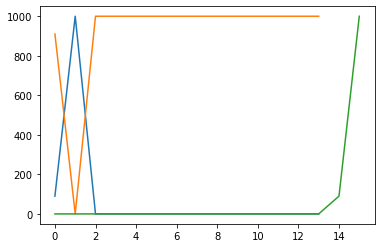

In [171]:
plt.plot(people_infected)
plt.plot(total_pop - people_infected)
plt.plot(people_recovered)

In [172]:
def one_day_ideal(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    people[0]-=people_interact*infect_chance
    people[1]+=people_interact*infect_chance
    #could change people array as needed for new number of infections, ... or make new variable
    return people

#what are some other functions that might be useful for our simulation

0.2


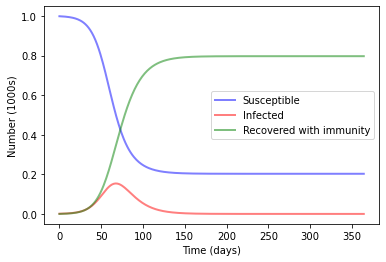

In [173]:
#taken from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Total population, N.
N = total_pop
t_max = 365
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = people_interact/total_pop
print(beta)
gamma = 1./days_infectious
# A grid of time points (in days)
t = np.arange(0,t_max, 1)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time (days)')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()